In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import pickle
import os
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# 1.  Download  the  dataset,  load  into  a  pandas  data  frame,  and prepare the datasets for analysis.

In [2]:
df = pd.read_csv('CC GENERAL.csv')
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

print('The snap of the dataset is shown below')
df.sample(4)

The dataset has 8950 rows and 18 columns.
The snap of the dataset is shown below


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8910,C19151,356.108694,1.0,465.00,465.00,0.00,0.000000,0.142857,0.142857,0.0,0.000000,0,1,1000.0,118.775188,109.227176,0.0,7
6568,C16747,6306.826232,1.0,0.00,0.00,0.00,3090.205975,0.000000,0.000000,0.0,0.916667,21,0,7500.0,1396.433544,1391.519296,0.0,12
61,C10063,1555.793701,1.0,66.20,66.20,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,1600.0,338.083661,837.215674,0.0,12
2783,C12863,6380.474771,1.0,4381.33,2080.87,2300.46,0.000000,0.666667,0.416667,0.5,0.000000,0,45,11500.0,1297.408037,2129.183138,0.0,12


# 2. Exploratory Data Analysis (EDA):

#### 2.1. General information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### 2.2. Null values

In [4]:
nulls = df.isnull().sum().sort_values(ascending=False)
print(f'There are {nulls.sum()} null values in the whole dataset.')

df.drop('CUST_ID', axis=1, inplace=True)

There are 314 null values in the whole dataset.


<Axes: >

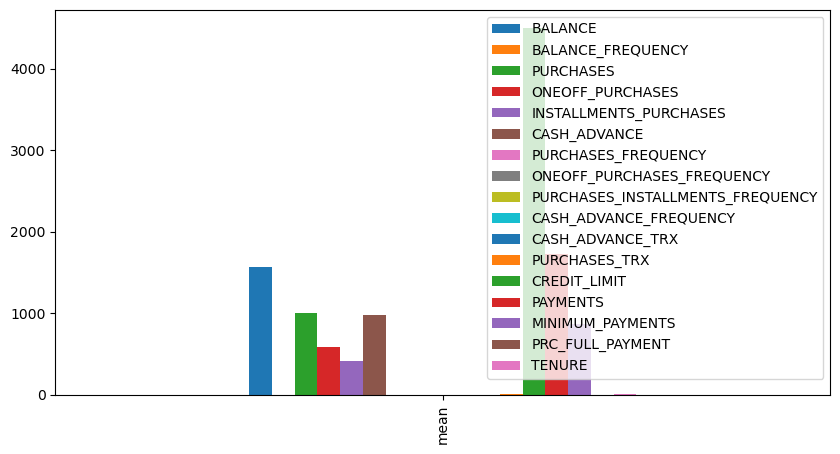

In [5]:
description  = df.describe()

description.loc[['mean']].plot(kind='bar', figsize=(10, 5))

# Annotate each bar with its value
# for i, value in enumerate(description.loc[['mean']].values.flatten()):
#     plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# plt.title('Mean Values')
# plt.xlabel('Feature')
# plt.ylabel('Mean')
# plt.show()

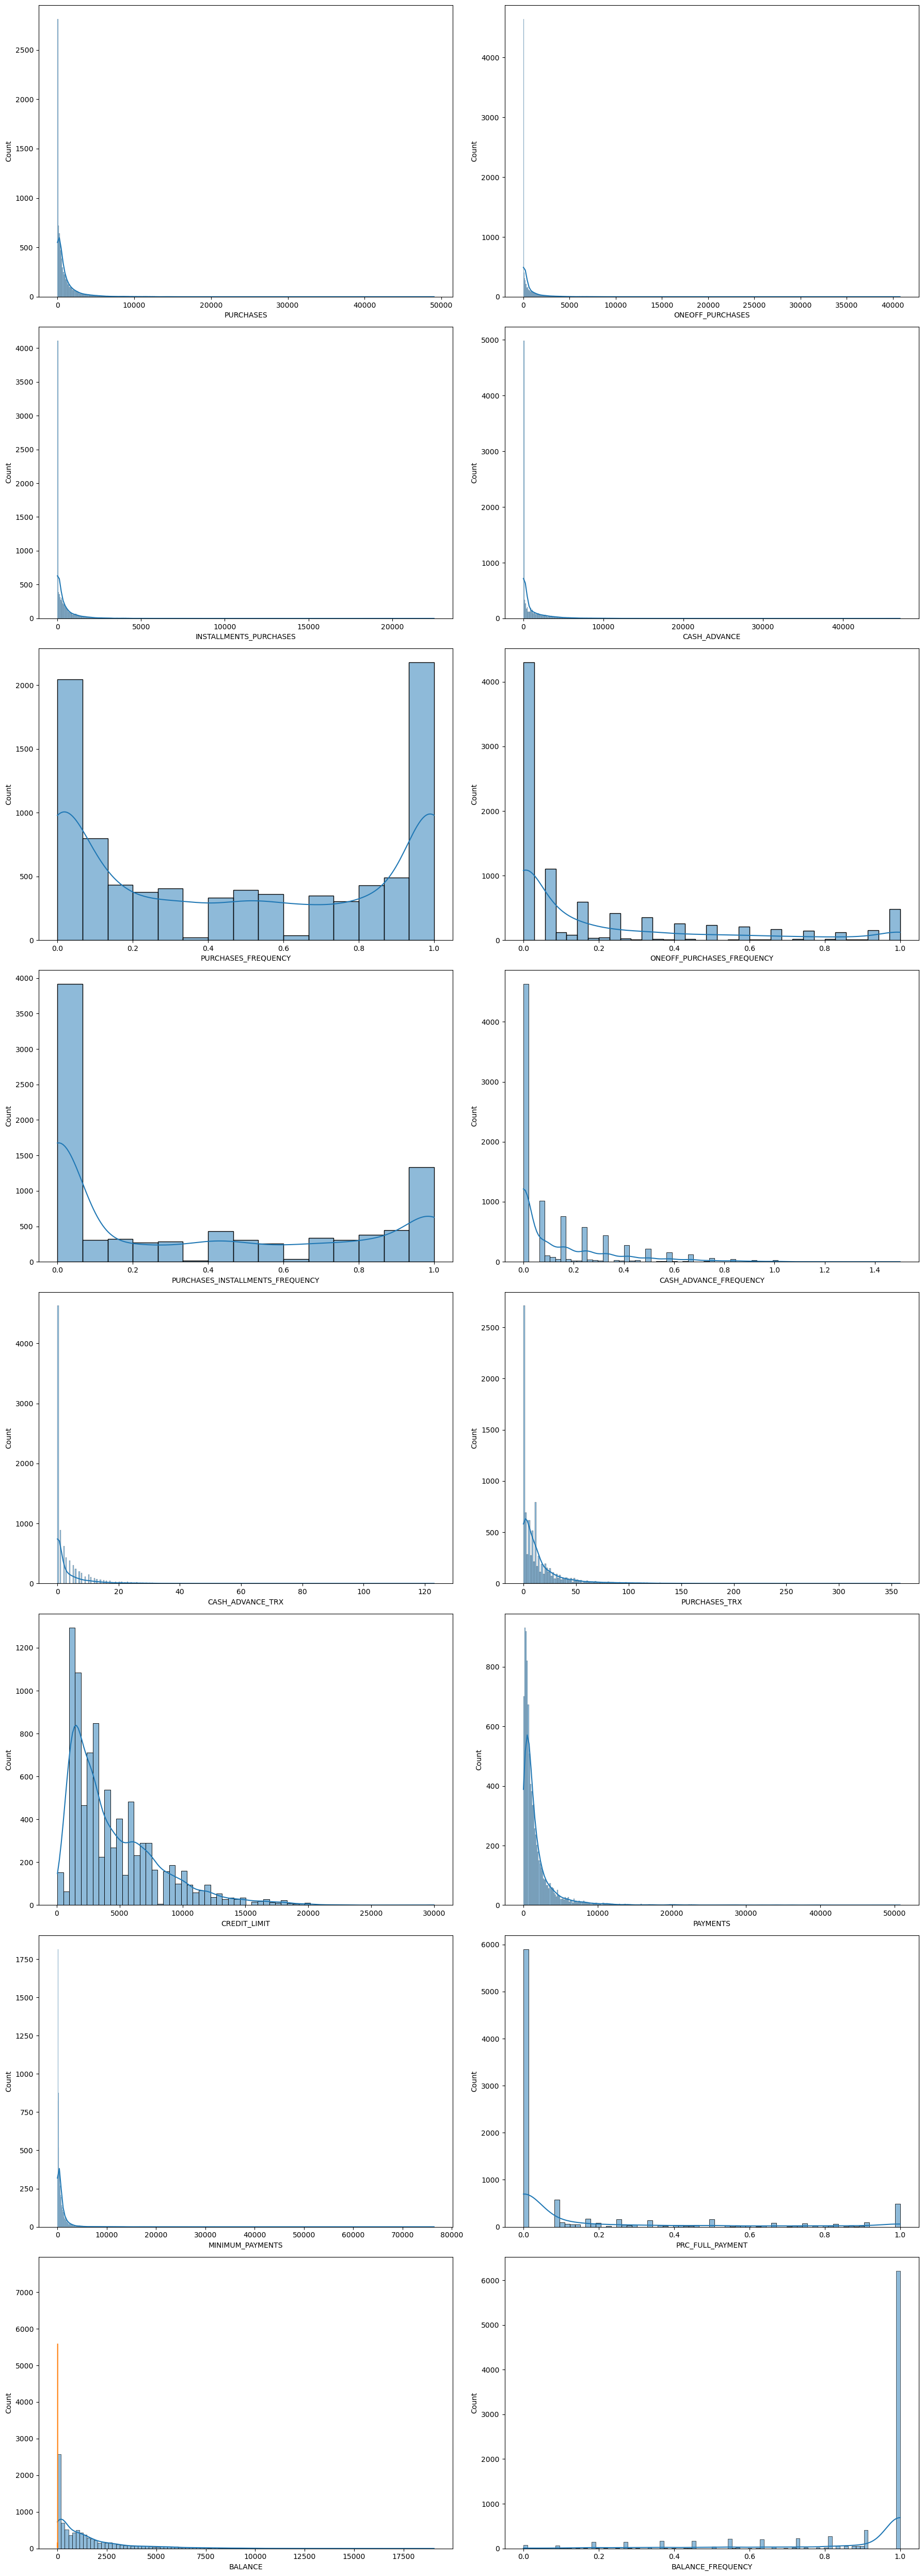

In [6]:
def plotter(df = df):
    ncols = df.shape[1]
    fig, axes = plt.subplots(nrows=ncols // 2, ncols=2, figsize=(18, 50))

    for i, column in enumerate(df.columns):
        row = i // 2 -1
        col = i % 2
        sns.histplot(df[column], kde=True, ax=axes[row, col])
        
    plt.tight_layout()
    plt.show()

plotter()

# Check the outlears

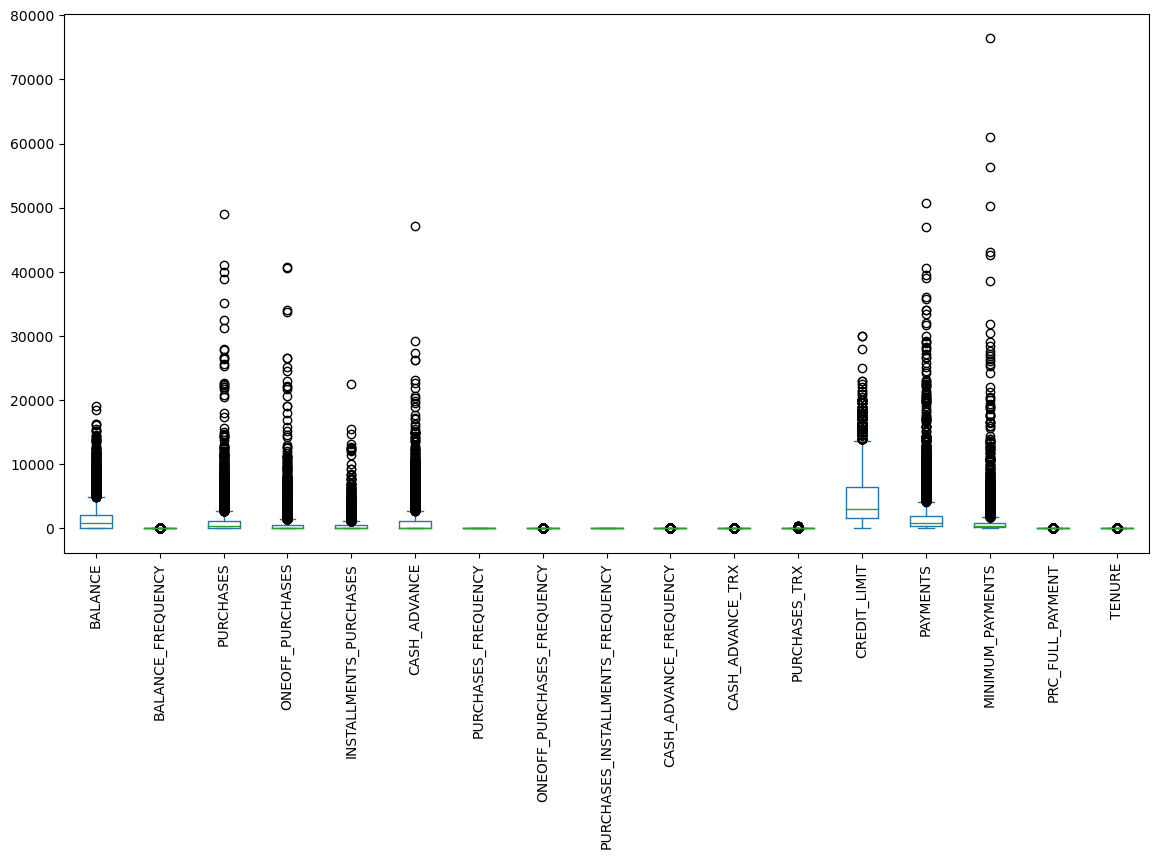

In [7]:
df.plot(kind = 'box', figsize=(14, 7))
plt.xticks(rotation =  90)
plt.show()

#### The dataset has outliers

In [8]:
# column_means = df.mean()
# df = df.fillna(column_means)


# from scipy.cluster.hierarchy import linkage, dendrogram


# # create a likage matrix
# linkage_matrix = linkage(df, 'ward')

# # plot a dendrogram
# plt.figure(figsize=(18,20))
# dendrogram(linkage_matrix)
# plt.show()


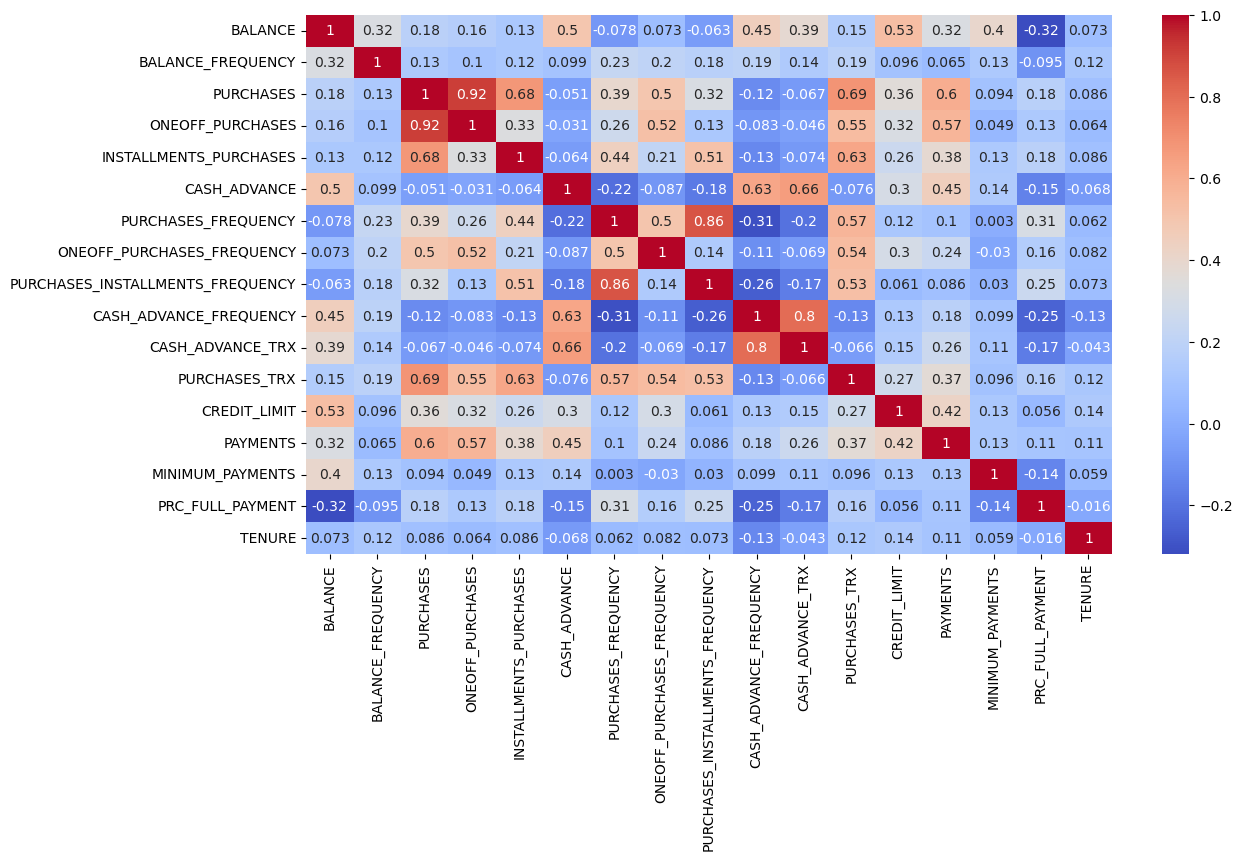

In [9]:
plt.figure(figsize=(13,7))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:

scaler =  StandardScaler()
X = scaler.fit_transform(df)

df_sacled = pd.DataFrame(X, columns=df.columns)

df_sacled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826016,-0.598688,NaN,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.486217,-0.343682,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.503396,NaN,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960380,-0.570615,-0.329547,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097795,-0.580536,-0.340786,0.329200,-4.122768


# hadle missiong values

In [16]:
df = df.apply(lambda col: col.fillna(col.mean()))

# 4. Unsupervised model creation and evaluation

In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation
from sklearn import metrics
import pickle
import os
from sklearn.preprocessing import StandardScaler

class ClusteringModelTrainer:
    def __init__(self, X):
        """
        Initialize the ClusteringModelTrainer.

        Parameters:
        - X: Input data for clustering.
        """
        self.X = X
        self.model_folder = "models"
        self.metrics = {}

    def evaluate_model(self, model):
        """
        Evaluate a clustering model using silhouette score.

        Parameters:
        - model: The trained clustering model.

        Returns:
        - silhouette_score: Silhouette score of the model.
        """
        if hasattr(model, 'labels_'):
            # For models with 'labels_' attribute (e.g., KMeans)
            labels = model.labels_
        else:
            # For models without 'labels_' attribute (e.g., GaussianMixture)
            labels = model.predict(self.X)

        # Check if there is only one unique label
        if len(set(labels)) == 1:
            return -1  # Return a default value when there's only one unique label

        df['label'] = labels  # Add the labels to the dataframe
        df.to_csv(f'data_{model}.csv', index=False)  # Save the dataframe to a CSV file
        silhouette_score = metrics.silhouette_score(self.X, labels)
        return silhouette_score

    def train_and_save_model(self, model, model_name):
        """
        Train a clustering model and save it using pickle.

        Parameters:
        - model: The clustering model to train.
        - model_name: Name of the model for saving.

        Returns:
        - silhouette_score: Silhouette score of the trained model.
        """
        os.makedirs(self.model_folder, exist_ok=True)
        model.fit(self.X)
        self.metrics[model_name] = self.evaluate_model(model)
        
        # Save the model separately using pickle
        model_filename = f"{self.model_folder}/{model_name}_model.pkl"
        with open(model_filename, 'wb') as model_file:
            pickle.dump(model, model_file)

        return self.metrics[model_name]

    def save_metrics(self, output_file="metrics.txt"):
        """
        Save evaluation metrics to a text file.

        Parameters:
        - output_file: File to save the metrics.
        """
        with open(output_file, "w") as file:
            for name, score in self.metrics.items():
                file.write(f"{name}: {score}\n")

if __name__ == "__main__":
    # Generate sample data (replace this with your own dataset)
    # X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
    scaler = StandardScaler()


    # save the scaler to a file
    scaler_filename = "scaler.pkl"
    try:
        with open(scaler_filename, 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)
            pass
    except FileNotFoundError:
        with open(scaler_filename, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)


    X = scaler.fit_transform(df)
    df = pd.DataFrame(X, columns=df.columns)
    # Create and train the ClusteringModelTrainer
    trainer = ClusteringModelTrainer(df)

    # Train and save each model
    kmeans_score = trainer.train_and_save_model(KMeans(n_clusters= 3,random_state = 42), "KMeans")
    minibatchkmeans_score = trainer.train_and_save_model(MiniBatchKMeans(random_state=42), "MiniBatchKMeans")
    affinitypropagation_score = trainer.train_and_save_model(AffinityPropagation(random_state=42), "AffinityPropagation")

    # Save metrics
    trainer.save_metrics()
    with open("metrics.txt", "r") as file:
        print(file.read())


KMeans: 0.27485107506159934
MiniBatchKMeans: 0.2927104624929401
AffinityPropagation: 0.578098408172051



## Check the cluster balance

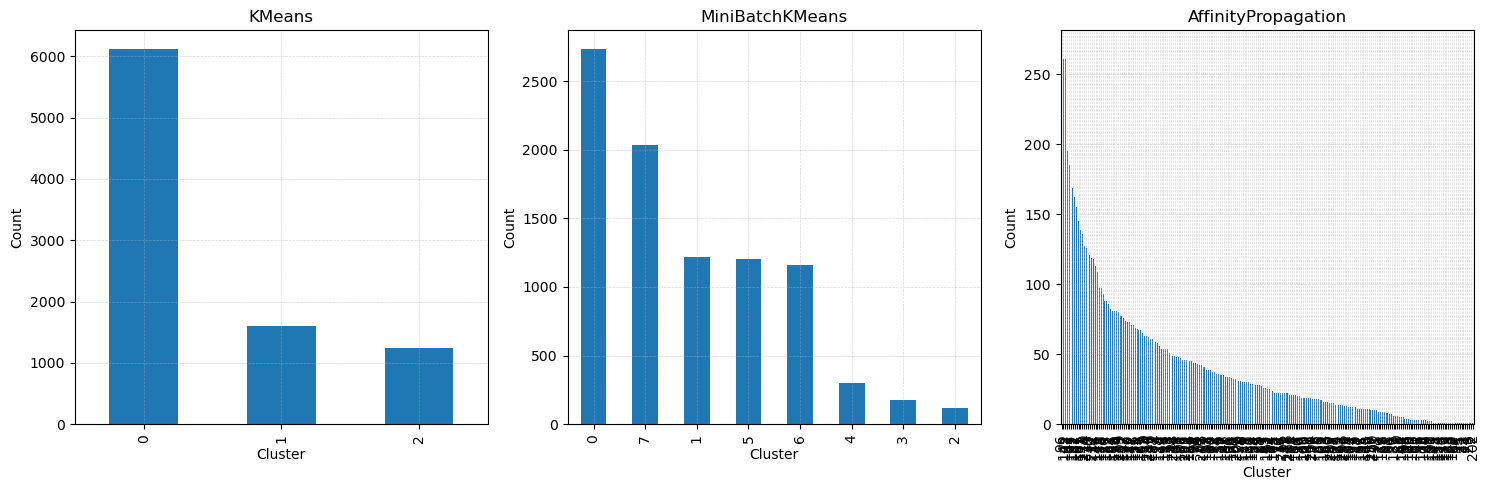

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axis for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# KMeans
lab_kmeans = pd.read_csv('data_KMeans(n_clusters=3, random_state=42).csv')
lab_kmeans['label'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].grid(True, linewidth=0.5, linestyle='--', alpha=0.5)
axs[0].set_title('KMeans')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Count')

# MiniBatchKMeans
lab_minibatch = pd.read_csv('data_MiniBatchKMeans(random_state=42).csv')
lab_minibatch['label'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].grid(True, linewidth=0.5, linestyle='--', alpha=0.5)
axs[1].set_title('MiniBatchKMeans')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Count')

# AffinityPropagation

lab_affinity = pd.read_csv('data_AffinityPropagation(random_state=42).csv')
lab_affinity['label'].value_counts().plot(kind='bar', ax=axs[2])
axs[2].grid(True, linewidth=0.5, linestyle='--', alpha=0.5)
axs[2].set_title('AffinityPropagation')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [17]:
# rename the file

import os

os.rename("data_MiniBatchKMeans(random_state=42).csv", "pntakiru-cc-labeled.csv")

# 5. Supervised model creation and evaluation

Cross-Validation Scores for LogisticRegression: [0.97318436 0.97206704 0.97709497 0.98268156 0.97374302]


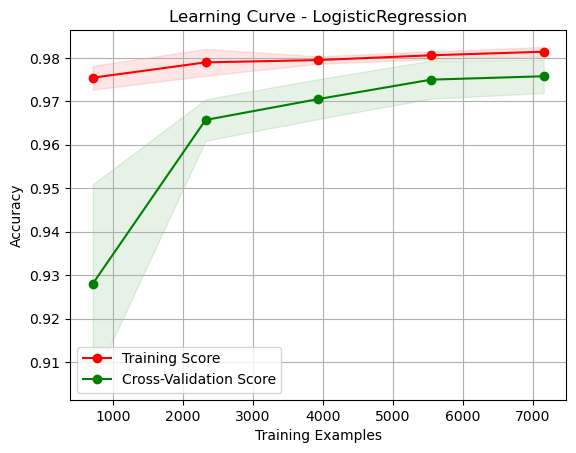

Model 'LogisticRegression' saved with metrics:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       547
           1       0.96      0.96      0.96       244
           2       1.00      0.88      0.93        24
           3       0.94      0.89      0.91        36
           4       0.92      0.92      0.92        60
           5       0.99      0.99      0.99       241
           6       0.96      0.96      0.96       231
           7       0.98      0.99      0.98       407

    accuracy                           0.97      1790
   macro avg       0.97      0.95      0.95      1790
weighted avg       0.97      0.97      0.97      1790

____________________________________________________________________________________________________
Cross-Validation Scores for KNeighborsClassifier: [0.93743017 0.92346369 0.9301676  0.9424581  0.92011173]


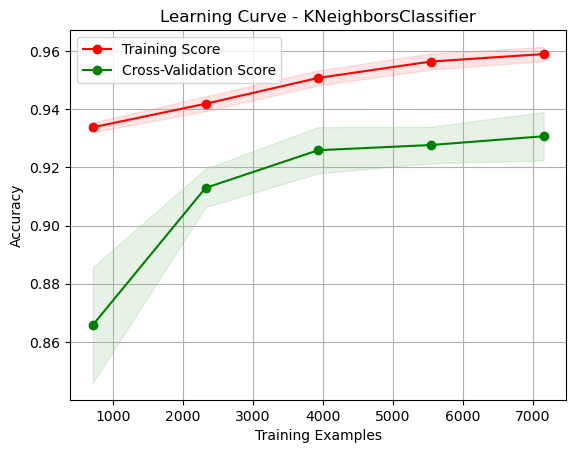

Model 'KNeighborsClassifier' saved with metrics:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       547
           1       0.90      0.93      0.92       244
           2       1.00      0.62      0.77        24
           3       0.93      0.78      0.85        36
           4       0.96      0.75      0.84        60
           5       0.96      0.95      0.96       241
           6       0.91      0.88      0.89       231
           7       0.92      0.95      0.94       407

    accuracy                           0.93      1790
   macro avg       0.94      0.85      0.89      1790
weighted avg       0.93      0.93      0.92      1790

____________________________________________________________________________________________________
Cross-Validation Scores for DecisionTreeClassifier: [0.89162011 0.89497207 0.90223464 0.91005587 0.8877095 ]


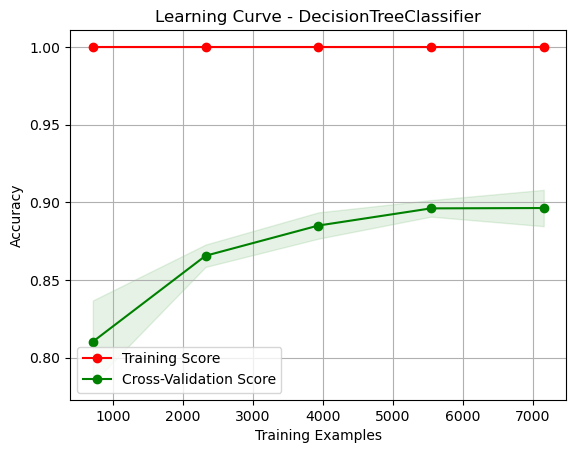

Model 'DecisionTreeClassifier' saved with metrics:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       547
           1       0.83      0.89      0.86       244
           2       0.64      0.67      0.65        24
           3       0.86      0.86      0.86        36
           4       0.71      0.62      0.66        60
           5       0.98      0.93      0.96       241
           6       0.89      0.86      0.87       231
           7       0.92      0.94      0.93       407

    accuracy                           0.91      1790
   macro avg       0.85      0.84      0.84      1790
weighted avg       0.91      0.91      0.91      1790

____________________________________________________________________________________________________
Cross-Validation Scores for RandomForestClassifier: [0.94413408 0.94636872 0.9424581  0.95251397 0.92625698]


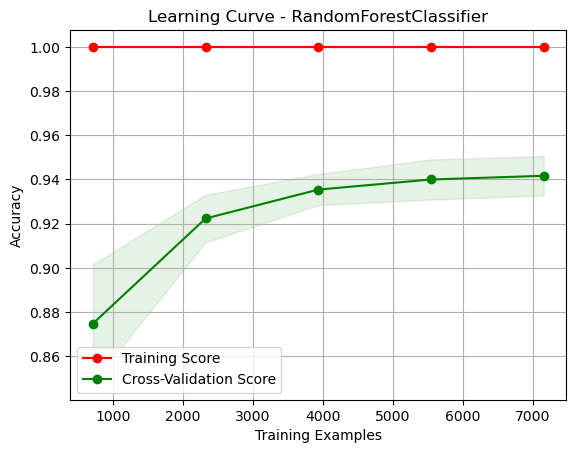

Model 'RandomForestClassifier' saved with metrics:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       547
           1       0.90      0.93      0.91       244
           2       0.88      0.62      0.73        24
           3       0.91      0.81      0.85        36
           4       0.88      0.75      0.81        60
           5       0.98      0.98      0.98       241
           6       0.91      0.93      0.92       231
           7       0.95      0.97      0.96       407

    accuracy                           0.94      1790
   macro avg       0.92      0.87      0.89      1790
weighted avg       0.94      0.94      0.94      1790

____________________________________________________________________________________________________
Cross-Validation Scores for SVC: [0.96536313 0.97039106 0.96927374 0.97932961 0.96424581]


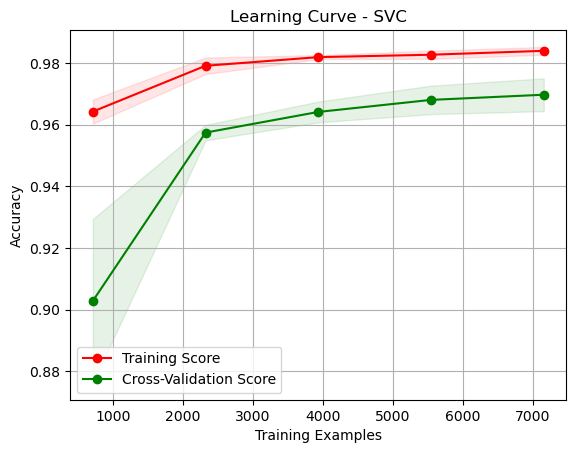

Model 'SVC' saved with metrics:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       547
           1       0.95      0.95      0.95       244
           2       0.95      0.75      0.84        24
           3       0.86      0.89      0.88        36
           4       0.91      0.88      0.90        60
           5       1.00      0.99      0.99       241
           6       0.95      0.95      0.95       231
           7       0.98      0.97      0.97       407

    accuracy                           0.97      1790
   macro avg       0.95      0.92      0.93      1790
weighted avg       0.97      0.97      0.97      1790

____________________________________________________________________________________________________


In [18]:
import os
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


class TrainSupervisedModels:
    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

    def train(self, model):
        try:
            # Use cross-validation during training
            cv_scores = cross_val_score(model, self.X, self.y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

            print(f"Cross-Validation Scores for {type(model).__name__}: {cv_scores}")
            
            # Plot learning curve
            train_sizes, train_scores, test_scores = learning_curve(model, self.X, self.y, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
            self.plot_learning_curve(train_sizes, train_scores, test_scores, type(model).__name__)
            
            # Fit the model on the entire training set
            model.fit(self.X_train, self.y_train)
        except Exception as e:
            print(f"Error occurred during training: {e}")
        return model

    def evaluate_metrics(self, model):
        try:
            y_pred = model.predict(self.X_test)
            metrics = classification_report(self.y_test, y_pred, output_dict=False)
        except Exception as e:
            print(f"Error occurred during metrics evaluation: {e}")
            metrics = None
        return metrics

    def save_model_and_metrics(self, model, model_name, folder="supervised"):
        if not os.path.exists(folder):
            os.makedirs(folder)

        # Save model
        model_filename = f"{folder}/model_{model_name}.pkl"
        with open(model_filename, "wb") as f:
            pickle.dump(model, f)

        # Save metrics
        metrics = self.evaluate_metrics(model)
        if metrics:
            metrics_filename = f"{folder}/metrics_{model_name}.txt"
            with open(metrics_filename, "w") as f:
                f.write(str(metrics))
            
            print(f"Model '{model_name}' saved with metrics:\n{metrics}")
            print('____________________________________________________________________________________________________')
        else:
            print(f"Model '{model_name}' saved, but metrics couldn't be calculated.")

    def plot_learning_curve(self, train_sizes, train_scores, test_scores, model_name):
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title(f"Learning Curve - {model_name}")
        plt.xlabel("Training Examples")
        plt.ylabel("Accuracy")

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")

        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

        plt.legend(loc="best")
        plt.grid(True)
        plt.show()


def main(models=[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]):
    data = pd.read_csv("pntakiru-cc-labeled.csv")
    X = data.drop('label', axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    y = data['label']
    model_trainer = TrainSupervisedModels(X, y)

    for model in models:
        trained_model = model_trainer.train(model)
        model_name = str(type(model).__name__)
        model_trainer.save_model_and_metrics(trained_model, model_name)


if __name__ == "__main__":
    main()


# 6. Feature Selection and Engineering

### 6 a&b)

Only 12 features are selected 
the features are ['PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'PURCHASES_TRX', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE_FREQUENCY', 'PAYMENTS', 'BALANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS']
_________________________________________________________________________________________________

Cross-Validation Scores for LogisticRegression: [0.93351955 0.92178771 0.93519553 0.93463687 0.91675978]


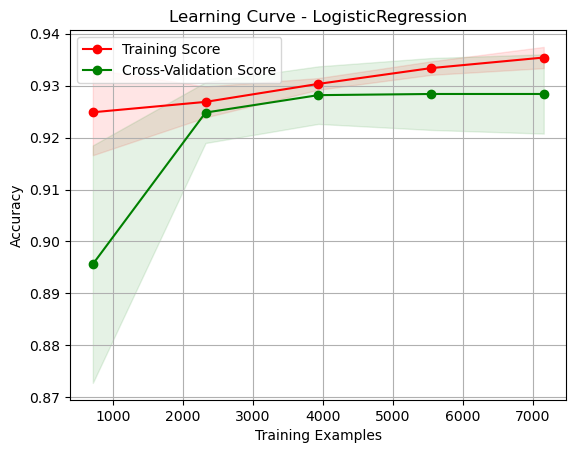

Model 'LogisticRegression' saved with metrics:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       547
           1       0.84      0.87      0.86       244
           2       0.54      0.54      0.54        24
           3       0.88      0.78      0.82        36
           4       0.85      0.78      0.82        60
           5       0.96      0.97      0.96       241
           6       0.91      0.94      0.92       231
           7       0.96      0.96      0.96       407

    accuracy                           0.92      1790
   macro avg       0.86      0.85      0.85      1790
weighted avg       0.92      0.92      0.92      1790

____________________________________________________________________________________________________
Cross-Validation Scores for KNeighborsClassifier: [0.91340782 0.89441341 0.9122905  0.91452514 0.89329609]


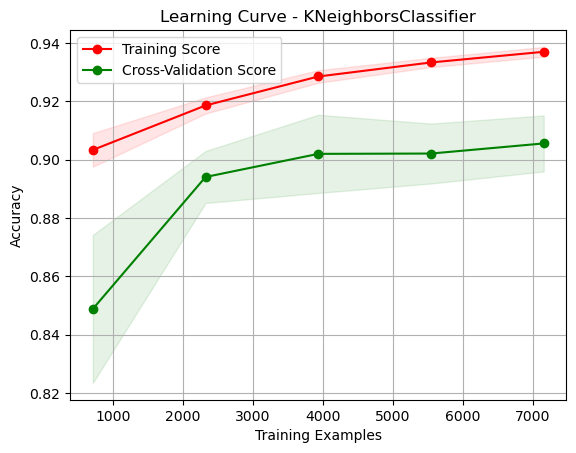

Model 'KNeighborsClassifier' saved with metrics:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       547
           1       0.87      0.85      0.86       244
           2       0.62      0.42      0.50        24
           3       0.89      0.67      0.76        36
           4       0.85      0.73      0.79        60
           5       0.96      0.95      0.96       241
           6       0.86      0.86      0.86       231
           7       0.93      0.94      0.94       407

    accuracy                           0.90      1790
   macro avg       0.86      0.80      0.82      1790
weighted avg       0.90      0.90      0.90      1790

____________________________________________________________________________________________________
Cross-Validation Scores for DecisionTreeClassifier: [0.85865922 0.87150838 0.87653631 0.87150838 0.86089385]


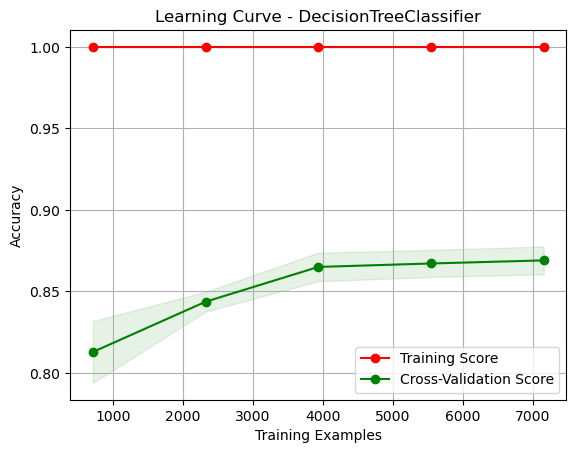

Model 'DecisionTreeClassifier' saved with metrics:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       547
           1       0.78      0.75      0.76       244
           2       0.47      0.58      0.52        24
           3       0.79      0.75      0.77        36
           4       0.71      0.62      0.66        60
           5       0.96      0.94      0.95       241
           6       0.80      0.84      0.82       231
           7       0.90      0.93      0.92       407

    accuracy                           0.87      1790
   macro avg       0.79      0.79      0.79      1790
weighted avg       0.87      0.87      0.87      1790

____________________________________________________________________________________________________
Cross-Validation Scores for RandomForestClassifier: [0.91731844 0.91955307 0.92234637 0.92793296 0.89553073]


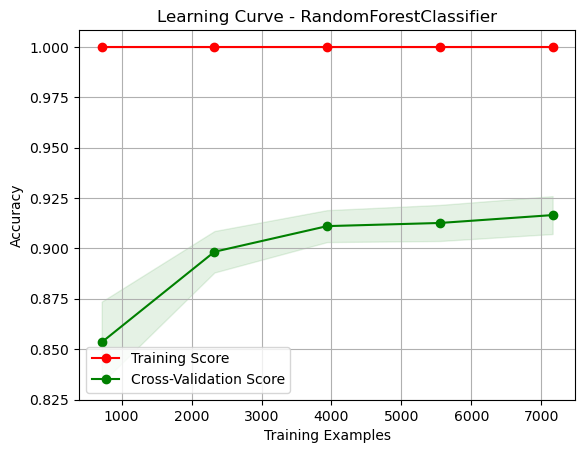

Model 'RandomForestClassifier' saved with metrics:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       547
           1       0.85      0.84      0.84       244
           2       0.80      0.33      0.47        24
           3       0.88      0.78      0.82        36
           4       0.87      0.75      0.80        60
           5       0.96      0.96      0.96       241
           6       0.87      0.89      0.88       231
           7       0.93      0.95      0.94       407

    accuracy                           0.91      1790
   macro avg       0.88      0.81      0.83      1790
weighted avg       0.91      0.91      0.91      1790

____________________________________________________________________________________________________
Cross-Validation Scores for SVC: [0.93072626 0.93296089 0.94581006 0.94357542 0.92346369]


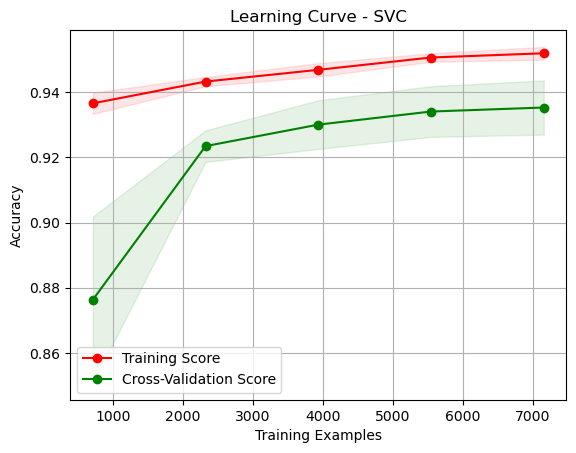

Model 'SVC' saved with metrics:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       547
           1       0.86      0.87      0.87       244
           2       0.67      0.50      0.57        24
           3       0.84      0.86      0.85        36
           4       0.91      0.83      0.87        60
           5       0.99      0.98      0.98       241
           6       0.91      0.93      0.92       231
           7       0.97      0.96      0.97       407

    accuracy                           0.93      1790
   macro avg       0.89      0.86      0.87      1790
weighted avg       0.93      0.93      0.93      1790

____________________________________________________________________________________________________


In [19]:
def main(models=[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]):
    # Load the data and select features using stebpwise selection
    data = pd.read_csv("pntakiru-cc-labeled.csv")
    X = data.drop('label', axis=1)

    y = data['label']
    from stepwise_regression import step_reg 
    selected_features = step_reg.forward_regression(X,y, 0.05, verbose=False)

    print(f'Only {len(selected_features)} features are selected \nthe features are {selected_features}')
    print('_________________________________________________________________________________________________\n')
    with open(scaler_filename, 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    X = scaler.fit_transform(data[selected_features])
    # feature selection is doe

    # call our train supervised learning class to train and evaluate the model on selected features, the model will be saved in a folder called "supervisedselectedfeatures"
    model_trainer = TrainSupervisedModels(X, y)
    for model in models:
        trained_model = model_trainer.train(model)
        model_name = str(type(model).__name__)
        model_trainer.save_model_and_metrics(trained_model, model_name, folder="supervisedselectedfeatures")

# Implement the above function
if __name__ == "__main__":
    main()

# 6.c)
comparing the both each model in both perspipective, with selected featututes and with all feature, logistic regresion is the best among all the models we trained because it does not overfit the data. The metric for training and cross validfation is not far different, and in addition to that it has the very good accuracy. The reason why we used accutracy was because the it helped us to work with unbalance data and in the selection of cross validation class, we use stratify function to make sure that that it treated the classes with each value.

Choosing one model between the one in **5** and the one in **6**, the best model is logistic regresion in 6 rather than the one in 5 because it uses less features, and use less computational resources as well as ptredicting well with accuracy of 0.97.

# 7. Hyperparameter tuning


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
import os

# Load data and perform necessary preprocessing
data = pd.read_csv("pntakiru-cc-labeled.csv")
selected_features = ['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'PURCHASES',\
                      'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY']
# Split data into features and labels
X = data[selected_features]

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X = scaler.fit_transform(X)
y = data['label']

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best Logistic Regression model from the search
best_logreg_model = grid_search.best_estimator_

# Save the best Logistic Regression model
os.makedirs("tuned_models", exist_ok=True)
model_filename = "tuned_models/best_logreg_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(best_logreg_model, f)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.8184357541899441


# 7.b)
The hyperparameters selected for the Logistic Regression model after grid search are {'C': 1, 'penalty': 'l1', 'solver': 'saga'. These choices reflect a balanced regularization approach (C=1), ensuring a moderate penalty for misclassifications. The 'l1' penalty suggests a preference for sparse solutions, encouraging some feature weights to be exactly zero. The 'saga' solver is chosen for its efficiency in handling large datasets and its support for both L1 and L2 regularization. Together, these hyperparameters aim to strike a suitable balance between model complexity and regularization strength, fostering a model that is interpretable, not overly complex, and effective in capturing the underlying patterns in the data.




# 7.c) Comparison of models
The best model after parameter tunning is still logistic regresion after without parameter tuning, we shall have it as the best model throught all the process. It is the best because it takes less time in training and the model has a better accuracy comparing to all other models.

# Deployment

In [ ]:
# from flask import Flask,render_template,request,flash

# ## Flask helps us to create a Flass app
# ## render_template helps us to render the html file  and read it from the file

# ## request helps us to read the user input entered by the user in the HTML form
# ## flash helps us to display the message to the user

# app=Flask(__name__) #creates the app to process the user input
# #Configure the app
# app.logger.setLevel('INFO')
# app.secret_key = "amakuru"

# #Define the functions that represent the actions that occur as the user interacts with the app.
# @app.route('/') 
# def home():
#     return render_template('index.html')
# """This above function will read the the index.html file and display it to the user. iT allow the user to enter inputs and using 
#     a web based techbiques. 
#     It creates a URL with / as the path
# """


# @app.route('/predict', methods=['GET','POST'])
# def predict():

#     ## Check if the request is POST from the HTML file
    
#     if request.method =='POST':
        
#         """Clump_thickness', 'Uniformity_of_cell_size',
#        'Uniformity_of_cell_shape', 'Marginal_adhesion',
#        'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
#        'Normal_nucleoli', 'Mitoses'"""
#         try:
#             BALANCE = float(request.form['BALANCE'])
#             BALANCE_FREQUENCY = float(request.form['BALANCE_FREQUENCY'])
#             PURCHASES = float(request.form['PURCHASES'])
#             ONEOFF_PURCHASES = float(request.form['ONEOFF_PURCHASES'])
#             INSTALLMENTS_PURCHASES = float(request.form['INSTALLMENTS_PURCHASES']) 
#             CASH_ADVANCE = float(request.form['CASH_ADVANCE'])
#             PURCHASES_FREQUENCY = float(request.form['PURCHASES_FREQUENCY'])
#             ONEOFF_PURCHASES_FREQUENCY = float(request.form['ONEOFF_PURCHASES_FREQUENCY'])
#             PURCHASES_INSTALLMENTS_FREQUENCY = float(request.form['PURCHASES_INSTALLMENTS_FREQUENCY'])

#             CASH_ADVANCE_FREQUENCY = float(request.form['CASH_ADVANCE_FREQUENCY'])
#             CASH_ADVANCE_TRX = int(request.form['CASH_ADVANCE_TRX'])
#             PURCHASES_TRX = int(request.form['PURCHASES_TRX'])
#             CREDIT_LIMIT = float(request.form['CREDIT_LIMIT'])
#             PAYMENTS = float(request.form['PAYMENTS']) 
#             MINIMUM_PAYMENTS = float(request.form['MINIMUM_PAYMENTS'])
#             PRC_FULL_PAYMENT = float(request.form['PRC_FULL_PAYMENT'])
#             TENURE = int(request.form['TENURE'])


#             #Consolidate the inputs
#             input_args=[BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES,\
#                         INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY,\
#                         ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY,\
#                         CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX,\
#                         CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
#             input_arr=np.array(input_args)
#             inputs=input_arr.reshape(1,-1)# 1 row, numpy with suggest the number of columns
#             #load the saved model
#             model = pickle.load(open('supervised/modelRandomForestClassifier().pkl','rb'))
#             result=model.predict(inputs)
            
#             print(f'The prediction is {result}')
#             #Transform result to human readable
#             prediction =f'Category {int(result)}'
#             color_signal='green'
                
#             #Populate flashed messages
#             flash(prediction)
#             flash(color_signal)
#             print(f'The prediction is {prediction}')

#         except ValueError:
#             return "Error: Values not valid."
#     return render_template('predict.html', prediction=prediction, color_signal=color_signal)
# if __name__=='__main__':
#     app.run(host='localhost', port=1887, debug=False)